In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.drop('id',axis=1,inplace=True)

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
df_continuous = df[['age', 'avg_glucose_level', 'bmi']]

In [12]:
# Removing values where gender = 'Other'
df = df[df['gender'] != 'Other']

In [13]:
bmi_mean = df['bmi'].mean()
print(bmi_mean)

stroke_mean_bmi = df.loc[df['stroke'] == 1, 'bmi'].mean()
print(stroke_mean_bmi)

nonstroke_mean_bmi = df.loc[df['stroke'] == 0, 'bmi'].mean()
print(nonstroke_mean_bmi)

df.loc[(df['stroke'] == 1) & (df['bmi'].isnull()), 'bmi'] = stroke_mean_bmi
df.loc[(df['stroke'] == 0) & (df['bmi'].isnull()), 'bmi'] = nonstroke_mean_bmi

df.isnull().sum()

28.894559902200502
30.47129186602871
28.824430729942552


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

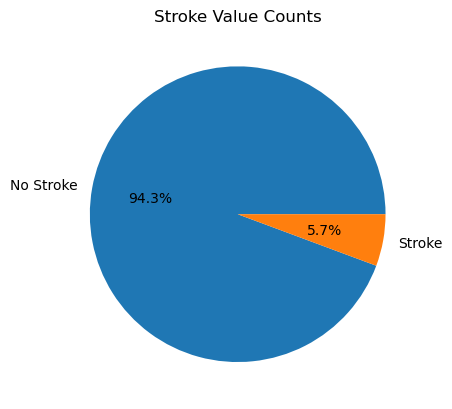

In [15]:
# Removing unknown smokers
df= df[df['smoking_status'] != 'Unknown']
stroke_counts = df['stroke'].value_counts()

# Plot a pie chart of stroke values
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()

In [16]:
df = pd.get_dummies(df, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'])

In [19]:
#Crossing age and bmi due to moderate correlation to capture any interactions
df['age_bmi'] = df['age'] * df['bmi']

In [20]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_bmi
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,...,0,1,0,0,0,1,1,0,0,2452.200000
1,61.0,0,0,202.21,30.471292,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,1858.748804
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,2600.000000
3,49.0,0,0,171.23,34.400000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,1685.600000
4,79.0,1,0,174.12,24.000000,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,1896.000000


## Standardization

In [22]:
#Performing standardization on continuous variables
from sklearn.preprocessing import StandardScaler

# Fit the StandardScaler to the training data
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

## Hypothesis Testing

In [23]:
numeric = df.select_dtypes(include=np.number).columns.tolist()
tstats_df = pd.DataFrame()
warnings.filterwarnings("ignore")

for eachvariable in numeric:
    tstats = stats.ttest_ind(df.loc[df["stroke"] == 1, eachvariable], df.loc[df["stroke"] == 0, eachvariable])
    temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ["Variable Name", "T stats", " P-value"]
    tstats_df = pd.concat([tstats_df, temp], axis = 0, ignore_index= True)
tstats_df = tstats_df.sort_values(by=" P-value").reset_index(drop=True)
print(tstats_df)

                     Variable Name    T stats   P-value
0                           stroke        inf       0.0
1                              age  15.462421       0.0
2                          age_bmi  13.159806       0.0
3                     hypertension   8.114004       0.0
4                    heart_disease   7.785221       0.0
5                avg_glucose_level    7.75112       0.0
6                 ever_married_Yes   4.669437  0.000003
7                  ever_married_No  -4.669437  0.000003
8          work_type_Self-employed   3.623796  0.000294
9   smoking_status_formerly smoked   3.344438  0.000833
10     smoking_status_never smoked  -2.498859  0.012504
11              work_type_children  -2.056443  0.039813
12               work_type_Private  -1.421657  0.155213
13              work_type_Govt_job  -1.077795  0.281198
14                   gender_Female  -0.930103  0.352381
15                     gender_Male   0.930103  0.352381
16          work_type_Never_worked  -0.918672   

## Removing Residence Type, Gender, and BMI

In [24]:
to_drop = ['Residence_type_Rural', 'Residence_type_Urban', 'gender_Male', 'gender_Female', 'bmi']
df2 = df.drop(to_drop, axis=1)
df2

,age,hypertension,heart_disease,avg_glucose_level,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_bmi
0,0.961273,0,1,2.479202,1,0,1,0,0,1,0,0,1,0,0,2452.200000
1,0.643316,0,0,1.930834,1,0,1,0,0,0,1,0,0,1,0,1858.748804
2,1.650179,0,1,-0.063211,1,0,1,0,0,1,0,0,0,1,0,2600.000000
3,0.007403,0,0,1.289277,1,0,1,0,0,1,0,0,0,0,1,1685.600000
4,1.597186,1,0,1.349126,1,0,1,0,0,0,1,0,0,1,0,1896.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0.431345,0,0,-0.642849,0,0,1,0,0,1,0,0,0,1,0,1236.900000
5105,1.650179,1,0,-0.522324,0,0,1,0,0,1,0,0,0,1,0,2305.954458
5106,1.703172,0,0,0.336054,0,0,1,0,0,0,1,0,0,1,0,3240.000000
5107,-0.734496,0,0,-0.538062,0,0,1,0,0,0,1,0,0,1,0,1071.000000


In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

X_df2 = df2.drop('stroke', axis=1)
y_df2 = df2['stroke']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_df2, y_df2, test_size=0.3, random_state=109)

In [26]:
from copy import deepcopy
from imblearn.over_sampling import SMOTE

# For original data set
# Instantiate SMOTE object
smote = SMOTE(random_state = 42, sampling_strategy = 0.5)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the number of samples in each class before and after resampling
print(f"Before resampling: \n{y_train.value_counts()}")
print(f"After resampling: \n{y_resampled.value_counts()}")

Before resampling: 
0    2339
1     156
Name: stroke, dtype: int64
After resampling: 
0    2339
1    1169
Name: stroke, dtype: int64


In [27]:
# for dataset without Residence Type, Gender, BMI

# Instantiate SMOTE object
smote = SMOTE(random_state = 42, sampling_strategy = 0.5)

# Resample the data
X_resampled2, y_resampled2 = smote.fit_resample(X_train2, y_train2)

# Print the number of samples in each class before and after resampling
print(f"Before resampling: \n{y_train2.value_counts()}")
print(f"After resampling: \n{y_resampled.value_counts()}")

Before resampling: 
0    2339
1     156
Name: stroke, dtype: int64
After resampling: 
0    2339
1    1169
Name: stroke, dtype: int64


## Function for Model Classification Results (for Neural Network)

In [81]:
# function to print out model's classification results 
def get_model_results_nn(classifier, predictions, y_pred, y_test):
    
    print("Results for "+ classifier)
    print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("Recall:", metrics.recall_score(y_test,y_pred))
    print("Precision:", metrics.precision_score(y_test,y_pred))
    print("F1 Score:", metrics.f1_score(y_test,y_pred))

    # confusion matrix 
    cfn_matrix = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
    print("\nConfusion Matrix:\n")
    print(cfn_matrix)

    # Classification Report 
    print("\nClassification Report:\n")

    print(classification_report(y_test, y_pred))
    
    accuracy = metrics.accuracy_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    results = [accuracy, recall, precision, f1]

    print(results)
    # print the auc curve and show auc score 
    
    # predicted probabilities of class 1 
    by_pred_prob_model = predictions.ravel()
    fpr, tpr, _ = metrics.roc_curve(y_test, by_pred_prob_model)
    auc = metrics.roc_auc_score(y_test, by_pred_prob_model)
    
    # plot roc curve 
    plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return

## Neural Networks

### Original Dataset

In [29]:
import keras.layers as layers
import keras.models
import tensorflow as tf

In [84]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scikeras.wrappers import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = keras.models.Sequential()
    model.add(layers.Dense(11, activation='relu', input_dim=20))
    model.add(layers.Dense(7, activation='relu', input_dim=20))
    model.add(layers.Dense(5, activation='relu', input_dim=20))
    model.add(layers.Dense(1, activation='sigmoid', name='predictions'))
    # return model without compile
    return model

# fix random seed for reproducibility
tf.random.set_seed(109)

# hyperparameter tuning

# create model
model = KerasClassifier(model=create_model, loss="binary_crossentropy", verbose=False, optimizer = keras.optimizers.Adam(lr=1e-5))

# define the grid search parameters
epochs = [250, 500, 750, 1000]
batch_size = [10, 20, 40, 60, 80, 100]
param_grid = dict(epochs=epochs, batch_size=batch_size)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1')
grid_result = grid.fit(X_resampled, y_resampled)

In [85]:
# summarize results
print('Best hyper parameters:', grid.best_params_, 'Score', grid.best_score_)

Best hyper parameters: {'batch_size': 10, 'epochs': 1000} Score 0.8032003892923794


In [46]:
model = keras.models.Sequential()
model.add(layers.Dense(11, activation='relu'))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid', name='predictions'))

In [47]:
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=1e-5), 
              metrics=['accuracy',
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall')])

In [52]:
# fit the model with data 
model.fit(X_resampled, y_resampled, epochs=1000, batch_size=10)

Epoch 1/1000
351/351 [==============================] - 0s 747us/step - loss: 0.2287 - accuracy: 0.9156 - precision: 0.9440 - recall: 0.7938
Epoch 2/1000
351/351 [==============================] - 0s 558us/step - loss: 0.2280 - accuracy: 0.9145 - precision: 0.9384 - recall: 0.7956
Epoch 3/1000
351/351 [==============================] - 0s 520us/step - loss: 0.2279 - accuracy: 0.9170 - precision: 0.9443 - recall: 0.7981
Epoch 4/1000
351/351 [==============================] - 0s 493us/step - loss: 0.2275 - accuracy: 0.9139 - precision: 0.9357 - recall: 0.7964
Epoch 5/1000
351/351 [==============================] - 0s 453us/step - loss: 0.2282 - accuracy: 0.9173 - precision: 0.9462 - recall: 0.7973
Epoch 6/1000
351/351 [==============================] - 0s 443us/step - loss: 0.2289 - accuracy: 0.9176 - precision: 0.9444 - recall: 0.7998
Epoch 7/1000
351/351 [==============================] - 0s 435us/step - loss: 0.2278 - accuracy: 0.9156 - precision: 0.9468 - recall: 0.7913
Epoch 8/1000


351/351 [==============================] - 0s 442us/step - loss: 0.2253 - accuracy: 0.9170 - precision: 0.9416 - recall: 0.8007
Epoch 59/1000
351/351 [==============================] - 0s 442us/step - loss: 0.2249 - accuracy: 0.9170 - precision: 0.9480 - recall: 0.7947
Epoch 60/1000
351/351 [==============================] - 0s 451us/step - loss: 0.2261 - accuracy: 0.9162 - precision: 0.9469 - recall: 0.7930
Epoch 61/1000
351/351 [==============================] - 0s 439us/step - loss: 0.2256 - accuracy: 0.9173 - precision: 0.9480 - recall: 0.7956
Epoch 62/1000
351/351 [==============================] - 0s 456us/step - loss: 0.2269 - accuracy: 0.9145 - precision: 0.9341 - recall: 0.7998
Epoch 63/1000
351/351 [==============================] - 0s 443us/step - loss: 0.2263 - accuracy: 0.9196 - precision: 0.9530 - recall: 0.7981
Epoch 64/1000
351/351 [==============================] - 0s 452us/step - loss: 0.2251 - accuracy: 0.9193 - precision: 0.9520 - recall: 0.7981
Epoch 65/1000
351/35

351/351 [==============================] - 0s 428us/step - loss: 0.2217 - accuracy: 0.9202 - precision: 0.9467 - recall: 0.8058
Epoch 116/1000
351/351 [==============================] - 0s 425us/step - loss: 0.2235 - accuracy: 0.9182 - precision: 0.9482 - recall: 0.7981
Epoch 117/1000
351/351 [==============================] - 0s 436us/step - loss: 0.2229 - accuracy: 0.9205 - precision: 0.9477 - recall: 0.8058
Epoch 118/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2226 - accuracy: 0.9199 - precision: 0.9485 - recall: 0.8033
Epoch 119/1000
351/351 [==============================] - 0s 445us/step - loss: 0.2237 - accuracy: 0.9176 - precision: 0.9444 - recall: 0.7998
Epoch 120/1000
351/351 [==============================] - 0s 452us/step - loss: 0.2223 - accuracy: 0.9182 - precision: 0.9482 - recall: 0.7981
Epoch 121/1000
351/351 [==============================] - 0s 456us/step - loss: 0.2232 - accuracy: 0.9179 - precision: 0.9436 - recall: 0.8015
Epoch 122/1000

351/351 [==============================] - 0s 439us/step - loss: 0.2218 - accuracy: 0.9210 - precision: 0.9523 - recall: 0.8033
Epoch 173/1000
351/351 [==============================] - 0s 435us/step - loss: 0.2218 - accuracy: 0.9202 - precision: 0.9504 - recall: 0.8024
Epoch 174/1000
351/351 [==============================] - 0s 446us/step - loss: 0.2214 - accuracy: 0.9213 - precision: 0.9533 - recall: 0.8033
Epoch 175/1000
351/351 [==============================] - 0s 430us/step - loss: 0.2216 - accuracy: 0.9199 - precision: 0.9458 - recall: 0.8058
Epoch 176/1000
351/351 [==============================] - 0s 431us/step - loss: 0.2194 - accuracy: 0.9202 - precision: 0.9485 - recall: 0.8041
Epoch 177/1000
351/351 [==============================] - 0s 448us/step - loss: 0.2213 - accuracy: 0.9259 - precision: 0.9614 - recall: 0.8101
Epoch 178/1000
351/351 [==============================] - 0s 436us/step - loss: 0.2221 - accuracy: 0.9202 - precision: 0.9476 - recall: 0.8050
Epoch 179/1000

351/351 [==============================] - 0s 439us/step - loss: 0.2186 - accuracy: 0.9222 - precision: 0.9507 - recall: 0.8084
Epoch 230/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2187 - accuracy: 0.9225 - precision: 0.9553 - recall: 0.8050
Epoch 231/1000
351/351 [==============================] - 0s 432us/step - loss: 0.2191 - accuracy: 0.9222 - precision: 0.9498 - recall: 0.8092
Epoch 232/1000
351/351 [==============================] - 0s 431us/step - loss: 0.2182 - accuracy: 0.9222 - precision: 0.9544 - recall: 0.8050
Epoch 233/1000
351/351 [==============================] - 0s 430us/step - loss: 0.2177 - accuracy: 0.9213 - precision: 0.9469 - recall: 0.8092
Epoch 234/1000
351/351 [==============================] - 0s 435us/step - loss: 0.2188 - accuracy: 0.9213 - precision: 0.9515 - recall: 0.8050
Epoch 235/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2189 - accuracy: 0.9230 - precision: 0.9563 - recall: 0.8058
Epoch 236/1000

351/351 [==============================] - 0s 440us/step - loss: 0.2168 - accuracy: 0.9233 - precision: 0.9536 - recall: 0.8092
Epoch 287/1000
351/351 [==============================] - 0s 437us/step - loss: 0.2178 - accuracy: 0.9236 - precision: 0.9537 - recall: 0.8101
Epoch 288/1000
351/351 [==============================] - 0s 461us/step - loss: 0.2172 - accuracy: 0.9210 - precision: 0.9514 - recall: 0.8041
Epoch 289/1000
351/351 [==============================] - 0s 443us/step - loss: 0.2175 - accuracy: 0.9230 - precision: 0.9491 - recall: 0.8127
Epoch 290/1000
351/351 [==============================] - 0s 437us/step - loss: 0.2189 - accuracy: 0.9202 - precision: 0.9467 - recall: 0.8058
Epoch 291/1000
351/351 [==============================] - 0s 431us/step - loss: 0.2166 - accuracy: 0.9262 - precision: 0.9624 - recall: 0.8101
Epoch 292/1000
351/351 [==============================] - 0s 437us/step - loss: 0.2176 - accuracy: 0.9242 - precision: 0.9602 - recall: 0.8058
Epoch 293/1000

351/351 [==============================] - 0s 430us/step - loss: 0.2142 - accuracy: 0.9239 - precision: 0.9556 - recall: 0.8092
Epoch 344/1000
351/351 [==============================] - 0s 430us/step - loss: 0.2155 - accuracy: 0.9236 - precision: 0.9555 - recall: 0.8084
Epoch 345/1000
351/351 [==============================] - 0s 430us/step - loss: 0.2161 - accuracy: 0.9213 - precision: 0.9461 - recall: 0.8101
Epoch 346/1000
351/351 [==============================] - 0s 442us/step - loss: 0.2161 - accuracy: 0.9230 - precision: 0.9518 - recall: 0.8101
Epoch 347/1000
351/351 [==============================] - 0s 463us/step - loss: 0.2161 - accuracy: 0.9222 - precision: 0.9553 - recall: 0.8041
Epoch 348/1000
351/351 [==============================] - 0s 463us/step - loss: 0.2158 - accuracy: 0.9245 - precision: 0.9538 - recall: 0.8127
Epoch 349/1000
351/351 [==============================] - 0s 474us/step - loss: 0.2150 - accuracy: 0.9253 - precision: 0.9540 - recall: 0.8152
Epoch 350/1000

351/351 [==============================] - 0s 437us/step - loss: 0.2136 - accuracy: 0.9256 - precision: 0.9586 - recall: 0.8118
Epoch 401/1000
351/351 [==============================] - 0s 435us/step - loss: 0.2133 - accuracy: 0.9242 - precision: 0.9484 - recall: 0.8169
Epoch 402/1000
351/351 [==============================] - 0s 444us/step - loss: 0.2139 - accuracy: 0.9242 - precision: 0.9547 - recall: 0.8109
Epoch 403/1000
351/351 [==============================] - 0s 445us/step - loss: 0.2145 - accuracy: 0.9250 - precision: 0.9557 - recall: 0.8127
Epoch 404/1000
351/351 [==============================] - 0s 435us/step - loss: 0.2135 - accuracy: 0.9247 - precision: 0.9557 - recall: 0.8118
Epoch 405/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2127 - accuracy: 0.9270 - precision: 0.9625 - recall: 0.8127
Epoch 406/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2136 - accuracy: 0.9247 - precision: 0.9585 - recall: 0.8092
Epoch 407/1000

351/351 [==============================] - 0s 438us/step - loss: 0.2117 - accuracy: 0.9253 - precision: 0.9512 - recall: 0.8178
Epoch 458/1000
351/351 [==============================] - 0s 436us/step - loss: 0.2121 - accuracy: 0.9273 - precision: 0.9579 - recall: 0.8178
Epoch 459/1000
351/351 [==============================] - 0s 436us/step - loss: 0.2128 - accuracy: 0.9242 - precision: 0.9574 - recall: 0.8084
Epoch 460/1000
351/351 [==============================] - 0s 428us/step - loss: 0.2109 - accuracy: 0.9256 - precision: 0.9549 - recall: 0.8152
Epoch 461/1000
351/351 [==============================] - 0s 431us/step - loss: 0.2128 - accuracy: 0.9247 - precision: 0.9530 - recall: 0.8144
Epoch 462/1000
351/351 [==============================] - 0s 430us/step - loss: 0.2134 - accuracy: 0.9245 - precision: 0.9556 - recall: 0.8109
Epoch 463/1000
351/351 [==============================] - 0s 432us/step - loss: 0.2120 - accuracy: 0.9279 - precision: 0.9636 - recall: 0.8144
Epoch 464/1000

351/351 [==============================] - 0s 439us/step - loss: 0.2096 - accuracy: 0.9259 - precision: 0.9577 - recall: 0.8135
Epoch 515/1000
351/351 [==============================] - 0s 439us/step - loss: 0.2116 - accuracy: 0.9236 - precision: 0.9528 - recall: 0.8109
Epoch 516/1000
351/351 [==============================] - 0s 435us/step - loss: 0.2120 - accuracy: 0.9250 - precision: 0.9567 - recall: 0.8118
Epoch 517/1000
351/351 [==============================] - 0s 438us/step - loss: 0.2112 - accuracy: 0.9270 - precision: 0.9570 - recall: 0.8178
Epoch 518/1000
351/351 [==============================] - 0s 445us/step - loss: 0.2113 - accuracy: 0.9247 - precision: 0.9585 - recall: 0.8092
Epoch 519/1000
351/351 [==============================] - 0s 441us/step - loss: 0.2086 - accuracy: 0.9265 - precision: 0.9587 - recall: 0.8144
Epoch 520/1000
351/351 [==============================] - 0s 440us/step - loss: 0.2112 - accuracy: 0.9273 - precision: 0.9626 - recall: 0.8135
Epoch 521/1000

351/351 [==============================] - 0s 433us/step - loss: 0.2098 - accuracy: 0.9262 - precision: 0.9615 - recall: 0.8109
Epoch 572/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2102 - accuracy: 0.9262 - precision: 0.9577 - recall: 0.8144
Epoch 573/1000
351/351 [==============================] - 0s 431us/step - loss: 0.2100 - accuracy: 0.9284 - precision: 0.9655 - recall: 0.8144
Epoch 574/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2101 - accuracy: 0.9267 - precision: 0.9625 - recall: 0.8118
Epoch 575/1000
351/351 [==============================] - 0s 430us/step - loss: 0.2095 - accuracy: 0.9253 - precision: 0.9576 - recall: 0.8118
Epoch 576/1000
351/351 [==============================] - 0s 428us/step - loss: 0.2092 - accuracy: 0.9262 - precision: 0.9624 - recall: 0.8101
Epoch 577/1000
351/351 [==============================] - 0s 427us/step - loss: 0.2083 - accuracy: 0.9267 - precision: 0.9634 - recall: 0.8109
Epoch 578/1000

351/351 [==============================] - 0s 436us/step - loss: 0.2092 - accuracy: 0.9256 - precision: 0.9586 - recall: 0.8118
Epoch 629/1000
351/351 [==============================] - 0s 438us/step - loss: 0.2076 - accuracy: 0.9273 - precision: 0.9570 - recall: 0.8186
Epoch 630/1000
351/351 [==============================] - 0s 436us/step - loss: 0.2087 - accuracy: 0.9284 - precision: 0.9608 - recall: 0.8186
Epoch 631/1000
351/351 [==============================] - 0s 438us/step - loss: 0.2098 - accuracy: 0.9265 - precision: 0.9615 - recall: 0.8118
Epoch 632/1000
351/351 [==============================] - 0s 438us/step - loss: 0.2065 - accuracy: 0.9276 - precision: 0.9589 - recall: 0.8178
Epoch 633/1000
351/351 [==============================] - 0s 443us/step - loss: 0.2094 - accuracy: 0.9293 - precision: 0.9647 - recall: 0.8178
Epoch 634/1000
351/351 [==============================] - 0s 436us/step - loss: 0.2082 - accuracy: 0.9284 - precision: 0.9655 - recall: 0.8144
Epoch 635/1000

351/351 [==============================] - 0s 438us/step - loss: 0.2065 - accuracy: 0.9299 - precision: 0.9676 - recall: 0.8169
Epoch 686/1000
351/351 [==============================] - 0s 432us/step - loss: 0.2080 - accuracy: 0.9284 - precision: 0.9590 - recall: 0.8204
Epoch 687/1000
351/351 [==============================] - 0s 430us/step - loss: 0.2069 - accuracy: 0.9245 - precision: 0.9584 - recall: 0.8084
Epoch 688/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2094 - accuracy: 0.9287 - precision: 0.9637 - recall: 0.8169
Epoch 689/1000
351/351 [==============================] - 0s 427us/step - loss: 0.2066 - accuracy: 0.9302 - precision: 0.9657 - recall: 0.8195
Epoch 690/1000
351/351 [==============================] - 0s 427us/step - loss: 0.2072 - accuracy: 0.9287 - precision: 0.9627 - recall: 0.8178
Epoch 691/1000
351/351 [==============================] - 0s 430us/step - loss: 0.2070 - accuracy: 0.9284 - precision: 0.9655 - recall: 0.8144
Epoch 692/1000

351/351 [==============================] - 0s 449us/step - loss: 0.2054 - accuracy: 0.9293 - precision: 0.9637 - recall: 0.8186
Epoch 743/1000
351/351 [==============================] - 0s 442us/step - loss: 0.2064 - accuracy: 0.9296 - precision: 0.9657 - recall: 0.8178
Epoch 744/1000
351/351 [==============================] - 0s 440us/step - loss: 0.2053 - accuracy: 0.9239 - precision: 0.9501 - recall: 0.8144
Epoch 745/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2057 - accuracy: 0.9290 - precision: 0.9656 - recall: 0.8161
Epoch 746/1000
351/351 [==============================] - 0s 427us/step - loss: 0.2050 - accuracy: 0.9296 - precision: 0.9685 - recall: 0.8152
Epoch 747/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2064 - accuracy: 0.9279 - precision: 0.9636 - recall: 0.8144
Epoch 748/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2057 - accuracy: 0.9270 - precision: 0.9588 - recall: 0.8161
Epoch 749/1000

351/351 [==============================] - 0s 437us/step - loss: 0.2051 - accuracy: 0.9284 - precision: 0.9646 - recall: 0.8152
Epoch 800/1000
351/351 [==============================] - 0s 439us/step - loss: 0.2050 - accuracy: 0.9307 - precision: 0.9696 - recall: 0.8178
Epoch 801/1000
351/351 [==============================] - 0s 436us/step - loss: 0.2043 - accuracy: 0.9279 - precision: 0.9580 - recall: 0.8195
Epoch 802/1000
351/351 [==============================] - 0s 431us/step - loss: 0.2040 - accuracy: 0.9273 - precision: 0.9616 - recall: 0.8144
Epoch 803/1000
351/351 [==============================] - 0s 437us/step - loss: 0.2048 - accuracy: 0.9270 - precision: 0.9606 - recall: 0.8144
Epoch 804/1000
351/351 [==============================] - 0s 432us/step - loss: 0.2051 - accuracy: 0.9287 - precision: 0.9656 - recall: 0.8152
Epoch 805/1000
351/351 [==============================] - 0s 437us/step - loss: 0.2052 - accuracy: 0.9299 - precision: 0.9666 - recall: 0.8178
Epoch 806/1000

351/351 [==============================] - 0s 444us/step - loss: 0.2035 - accuracy: 0.9304 - precision: 0.9667 - recall: 0.8195
Epoch 857/1000
351/351 [==============================] - 0s 439us/step - loss: 0.2028 - accuracy: 0.9302 - precision: 0.9629 - recall: 0.8221
Epoch 858/1000
351/351 [==============================] - 0s 449us/step - loss: 0.2034 - accuracy: 0.9293 - precision: 0.9637 - recall: 0.8186
Epoch 859/1000
351/351 [==============================] - 0s 470us/step - loss: 0.2037 - accuracy: 0.9290 - precision: 0.9656 - recall: 0.8161
Epoch 860/1000
351/351 [==============================] - 0s 537us/step - loss: 0.2035 - accuracy: 0.9296 - precision: 0.9714 - recall: 0.8127
Epoch 861/1000
351/351 [==============================] - 0s 490us/step - loss: 0.2040 - accuracy: 0.9284 - precision: 0.9599 - recall: 0.8195
Epoch 862/1000
351/351 [==============================] - 0s 488us/step - loss: 0.2034 - accuracy: 0.9307 - precision: 0.9639 - recall: 0.8229
Epoch 863/1000

351/351 [==============================] - 0s 434us/step - loss: 0.2029 - accuracy: 0.9279 - precision: 0.9654 - recall: 0.8127
Epoch 914/1000
351/351 [==============================] - 0s 428us/step - loss: 0.2030 - accuracy: 0.9293 - precision: 0.9647 - recall: 0.8178
Epoch 915/1000
351/351 [==============================] - 0s 428us/step - loss: 0.2031 - accuracy: 0.9302 - precision: 0.9724 - recall: 0.8135
Epoch 916/1000
351/351 [==============================] - 0s 442us/step - loss: 0.2032 - accuracy: 0.9310 - precision: 0.9696 - recall: 0.8186
Epoch 917/1000
351/351 [==============================] - 0s 443us/step - loss: 0.2014 - accuracy: 0.9319 - precision: 0.9706 - recall: 0.8204
Epoch 918/1000
351/351 [==============================] - 0s 445us/step - loss: 0.2020 - accuracy: 0.9304 - precision: 0.9667 - recall: 0.8195
Epoch 919/1000
351/351 [==============================] - 0s 450us/step - loss: 0.2029 - accuracy: 0.9302 - precision: 0.9695 - recall: 0.8161
Epoch 920/1000

351/351 [==============================] - 0s 440us/step - loss: 0.2023 - accuracy: 0.9299 - precision: 0.9638 - recall: 0.8204
Epoch 971/1000
351/351 [==============================] - 0s 432us/step - loss: 0.2018 - accuracy: 0.9304 - precision: 0.9695 - recall: 0.8169
Epoch 972/1000
351/351 [==============================] - 0s 436us/step - loss: 0.2017 - accuracy: 0.9299 - precision: 0.9676 - recall: 0.8169
Epoch 973/1000
351/351 [==============================] - 0s 436us/step - loss: 0.2024 - accuracy: 0.9299 - precision: 0.9685 - recall: 0.8161
Epoch 974/1000
351/351 [==============================] - 0s 432us/step - loss: 0.2021 - accuracy: 0.9304 - precision: 0.9658 - recall: 0.8204
Epoch 975/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2012 - accuracy: 0.9322 - precision: 0.9697 - recall: 0.8221
Epoch 976/1000
351/351 [==============================] - 0s 429us/step - loss: 0.2013 - accuracy: 0.9284 - precision: 0.9646 - recall: 0.8152
Epoch 977/1000

In [53]:
predictions = model.predict(X_test)
y_pred = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

34/34 [==============================] - 0s 416us/step


Results for Neural Network
Accuracy: 0.9504672897196261
Recall: 0.021739130434782608
Precision: 0.1111111111111111
F1 Score: 0.03636363636363637

Confusion Matrix:

[[   1   45]
 [   8 1016]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1024
           1       0.11      0.02      0.04        46

    accuracy                           0.95      1070
   macro avg       0.53      0.51      0.51      1070
weighted avg       0.92      0.95      0.93      1070

[0.9504672897196261, 0.021739130434782608, 0.1111111111111111, 0.03636363636363637]


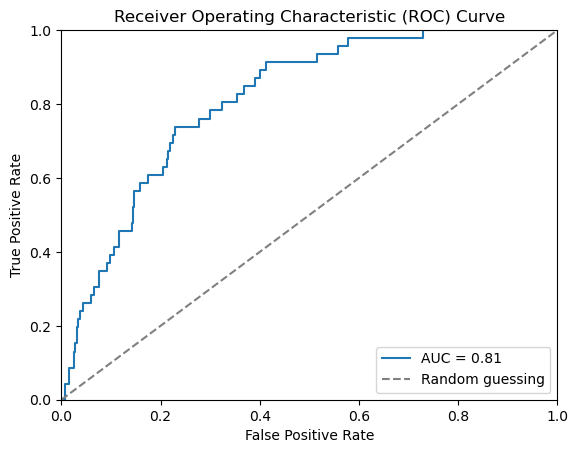

In [82]:
from sklearn import metrics
from sklearn.metrics import classification_report
get_model_results_nn("Neural Network", predictions, y_pred, y_test)

### Dataset without Residence Type

In [60]:
# Function to create model, required for KerasClassifier
def create_model2():
    # create model
    model = keras.models.Sequential()
    model.add(layers.Dense(11, activation='relu', input_dim=15))
    model.add(layers.Dense(7, activation='relu', input_dim=15))
    model.add(layers.Dense(5, activation='relu', input_dim=15))
    model.add(layers.Dense(1, activation='sigmoid', name='predictions'))
    # return model without compile
    return model

# fix random seed for reproducibility
tf.random.set_seed(109)

# hyperparameter tuning
# create model
model2 = KerasClassifier(model=create_model2, loss="binary_crossentropy", verbose=False, optimizer = keras.optimizers.Adam(lr=1e-5))

grid2 = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='f1')
grid_result2 = grid2.fit(X_resampled2, y_resampled2)

In [63]:
# summarize results
print('Best hyper parameters:', grid2.best_params_, 'Score', grid2.best_score_)

Best hyper parameters: {'batch_size': 20, 'epochs': 1000} Score 0.6422465606224405


In [65]:
model2 = keras.models.Sequential()
model2.add(layers.Dense(11, activation='relu'))
model2.add(layers.Dense(7, activation='relu'))
model2.add(layers.Dense(5, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid', name='predictions'))

In [66]:
model2.compile(loss='binary_crossentropy', 
               optimizer=keras.optimizers.Adam(lr=1e-5), 
               metrics=['accuracy',
                        keras.metrics.Precision(name='precision'),
                        keras.metrics.Recall(name='recall')])

In [67]:
# fit the model with data 
model2.fit(X_resampled2, y_resampled2, epochs=1000, batch_size=20)

Epoch 1/1000
176/176 [==============================] - 1s 876us/step - loss: 1.4929 - accuracy: 0.3332 - precision: 0.3332 - recall: 1.0000
Epoch 2/1000
176/176 [==============================] - 0s 775us/step - loss: 1.2888 - accuracy: 0.3332 - precision: 0.3332 - recall: 1.0000
Epoch 3/1000
176/176 [==============================] - 0s 658us/step - loss: 1.1848 - accuracy: 0.3332 - precision: 0.3332 - recall: 1.0000
Epoch 4/1000
176/176 [==============================] - 0s 622us/step - loss: 1.0917 - accuracy: 0.3332 - precision: 0.3332 - recall: 1.0000
Epoch 5/1000
176/176 [==============================] - 0s 674us/step - loss: 1.0109 - accuracy: 0.3332 - precision: 0.3332 - recall: 1.0000
Epoch 6/1000
176/176 [==============================] - 0s 636us/step - loss: 0.9420 - accuracy: 0.3332 - precision: 0.3332 - recall: 1.0000
Epoch 7/1000
176/176 [==============================] - 0s 582us/step - loss: 0.8841 - accuracy: 0.3332 - precision: 0.3332 - recall: 1.0000
Epoch 8/1000


176/176 [==============================] - 0s 438us/step - loss: 0.6753 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 57/1000
176/176 [==============================] - 0s 439us/step - loss: 0.6752 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 58/1000
176/176 [==============================] - 0s 441us/step - loss: 0.6751 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 59/1000
176/176 [==============================] - 0s 439us/step - loss: 0.6749 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 60/1000
176/176 [==============================] - 0s 496us/step - loss: 0.6748 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 61/1000
176/176 [==============================] - 0s 432us/step - loss: 0.6747 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 62/1000
176/176 [==============================] - 0s 462us/step - loss: 0.6746 - accuracy: 0.6668 - precisi

176/176 [==============================] - 0s 454us/step - loss: 0.6696 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 111/1000
176/176 [==============================] - 0s 449us/step - loss: 0.6695 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 112/1000
176/176 [==============================] - 0s 590us/step - loss: 0.6694 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 113/1000
176/176 [==============================] - 0s 526us/step - loss: 0.6693 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 114/1000
176/176 [==============================] - 0s 498us/step - loss: 0.6692 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 115/1000
176/176 [==============================] - 0s 477us/step - loss: 0.6691 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 116/1000
176/176 [==============================] - 0s 551us/step - loss: 0.6690 - accuracy: 0.6668 - p

176/176 [==============================] - 0s 414us/step - loss: 0.6642 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 165/1000
176/176 [==============================] - 0s 440us/step - loss: 0.6641 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 166/1000
176/176 [==============================] - 0s 459us/step - loss: 0.6640 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 167/1000
176/176 [==============================] - 0s 447us/step - loss: 0.6639 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 168/1000
176/176 [==============================] - 0s 420us/step - loss: 0.6638 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 169/1000
176/176 [==============================] - 0s 429us/step - loss: 0.6637 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 170/1000
176/176 [==============================] - 0s 419us/step - loss: 0.6636 - accuracy: 0.6668 - p

176/176 [==============================] - 0s 457us/step - loss: 0.6590 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 219/1000
176/176 [==============================] - 0s 457us/step - loss: 0.6589 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 220/1000
176/176 [==============================] - 0s 451us/step - loss: 0.6588 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 221/1000
176/176 [==============================] - 0s 452us/step - loss: 0.6587 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 222/1000
176/176 [==============================] - 0s 452us/step - loss: 0.6586 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 223/1000
176/176 [==============================] - 0s 445us/step - loss: 0.6585 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 224/1000
176/176 [==============================] - 0s 432us/step - loss: 0.6584 - accuracy: 0.6668 - p

176/176 [==============================] - 0s 448us/step - loss: 0.6541 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 273/1000
176/176 [==============================] - 0s 429us/step - loss: 0.6540 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 274/1000
176/176 [==============================] - 0s 438us/step - loss: 0.6539 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 275/1000
176/176 [==============================] - 0s 439us/step - loss: 0.6538 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 276/1000
176/176 [==============================] - 0s 434us/step - loss: 0.6537 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 277/1000
176/176 [==============================] - 0s 465us/step - loss: 0.6536 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 278/1000
176/176 [==============================] - 0s 445us/step - loss: 0.6535 - accuracy: 0.6668 - p

176/176 [==============================] - 0s 441us/step - loss: 0.6494 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 327/1000
176/176 [==============================] - 0s 437us/step - loss: 0.6493 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 328/1000
176/176 [==============================] - 0s 461us/step - loss: 0.6492 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 329/1000
176/176 [==============================] - 0s 461us/step - loss: 0.6491 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 330/1000
176/176 [==============================] - 0s 470us/step - loss: 0.6490 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 331/1000
176/176 [==============================] - 0s 471us/step - loss: 0.6489 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 332/1000
176/176 [==============================] - 0s 466us/step - loss: 0.6489 - accuracy: 0.6668 - p

176/176 [==============================] - 0s 464us/step - loss: 0.6448 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 381/1000
176/176 [==============================] - 0s 452us/step - loss: 0.6447 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 382/1000
176/176 [==============================] - 0s 477us/step - loss: 0.6446 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 383/1000
176/176 [==============================] - 0s 501us/step - loss: 0.6446 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 384/1000
176/176 [==============================] - 0s 700us/step - loss: 0.6445 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 385/1000
176/176 [==============================] - 0s 667us/step - loss: 0.6444 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 386/1000
176/176 [==============================] - 0s 843us/step - loss: 0.6443 - accuracy: 0.6668 - p

176/176 [==============================] - 0s 430us/step - loss: 0.6403 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 435/1000
176/176 [==============================] - 0s 447us/step - loss: 0.6402 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 436/1000
176/176 [==============================] - 0s 425us/step - loss: 0.6401 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 437/1000
176/176 [==============================] - 0s 426us/step - loss: 0.6401 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 438/1000
176/176 [==============================] - 0s 430us/step - loss: 0.6400 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 439/1000
176/176 [==============================] - 0s 437us/step - loss: 0.6399 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 440/1000
176/176 [==============================] - 0s 425us/step - loss: 0.6398 - accuracy: 0.6668 - p

176/176 [==============================] - 0s 441us/step - loss: 0.6359 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 489/1000
176/176 [==============================] - 0s 427us/step - loss: 0.6358 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 490/1000
176/176 [==============================] - 0s 430us/step - loss: 0.6357 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 491/1000
176/176 [==============================] - 0s 441us/step - loss: 0.6356 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 492/1000
176/176 [==============================] - 0s 446us/step - loss: 0.6355 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 493/1000
176/176 [==============================] - 0s 457us/step - loss: 0.6355 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 494/1000
176/176 [==============================] - 0s 426us/step - loss: 0.6354 - accuracy: 0.6668 - p

176/176 [==============================] - 0s 452us/step - loss: 0.6315 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 543/1000
176/176 [==============================] - 0s 451us/step - loss: 0.6314 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 544/1000
176/176 [==============================] - 0s 446us/step - loss: 0.6314 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 545/1000
176/176 [==============================] - 0s 449us/step - loss: 0.6313 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 546/1000
176/176 [==============================] - 0s 455us/step - loss: 0.6312 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 547/1000
176/176 [==============================] - 0s 438us/step - loss: 0.6311 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 548/1000
176/176 [==============================] - 0s 456us/step - loss: 0.6311 - accuracy: 0.6668 - p

176/176 [==============================] - 0s 449us/step - loss: 0.6273 - accuracy: 0.6665 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 597/1000
176/176 [==============================] - 0s 421us/step - loss: 0.6273 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 598/1000
176/176 [==============================] - 0s 440us/step - loss: 0.6271 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 599/1000
176/176 [==============================] - 0s 432us/step - loss: 0.6270 - accuracy: 0.6665 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 600/1000
176/176 [==============================] - 0s 450us/step - loss: 0.6270 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 601/1000
176/176 [==============================] - 0s 444us/step - loss: 0.6269 - accuracy: 0.6668 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 602/1000
176/176 [==============================] - 0s 432us/step - loss: 0.6268 - accuracy: 0.6668 - p

176/176 [==============================] - 0s 437us/step - loss: 0.6231 - accuracy: 0.6665 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 651/1000
176/176 [==============================] - 0s 448us/step - loss: 0.6231 - accuracy: 0.6665 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 652/1000
176/176 [==============================] - 0s 431us/step - loss: 0.6230 - accuracy: 0.6665 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 653/1000
176/176 [==============================] - 0s 443us/step - loss: 0.6229 - accuracy: 0.6665 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 654/1000
176/176 [==============================] - 0s 436us/step - loss: 0.6229 - accuracy: 0.6665 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 655/1000
176/176 [==============================] - 0s 420us/step - loss: 0.6228 - accuracy: 0.6665 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 656/1000
176/176 [==============================] - 0s 442us/step - loss: 0.6227 - accuracy: 0.6665 - p

176/176 [==============================] - 0s 435us/step - loss: 0.6190 - accuracy: 0.6662 - precision: 0.2500 - recall: 8.5543e-04
Epoch 706/1000
176/176 [==============================] - 0s 643us/step - loss: 0.6189 - accuracy: 0.6662 - precision: 0.2500 - recall: 8.5543e-04
Epoch 707/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.6659 - precision: 0.2000 - recall: 8.5543e-04
Epoch 708/1000
176/176 [==============================] - 0s 932us/step - loss: 0.6188 - accuracy: 0.6662 - precision: 0.2500 - recall: 8.5543e-04
Epoch 709/1000
176/176 [==============================] - 0s 987us/step - loss: 0.6187 - accuracy: 0.6659 - precision: 0.2000 - recall: 8.5543e-04
Epoch 710/1000
176/176 [==============================] - 0s 855us/step - loss: 0.6186 - accuracy: 0.6662 - precision: 0.2500 - recall: 8.5543e-04
Epoch 711/1000
176/176 [==============================] - 0s 451us/step - loss: 0.6186 - accuracy: 0.6653 - precision: 0.1429 - recall:

176/176 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.6659 - precision: 0.3846 - recall: 0.0043
Epoch 762/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.6662 - precision: 0.4444 - recall: 0.0068 
Epoch 763/1000
176/176 [==============================] - 0s 994us/step - loss: 0.6147 - accuracy: 0.6659 - precision: 0.4118 - recall: 0.0060
Epoch 764/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.6147 - accuracy: 0.6656 - precision: 0.3571 - recall: 0.0043
Epoch 765/1000
176/176 [==============================] - 0s 892us/step - loss: 0.6146 - accuracy: 0.6662 - precision: 0.4286 - recall: 0.0051
Epoch 766/1000
176/176 [==============================] - 0s 856us/step - loss: 0.6145 - accuracy: 0.6665 - precision: 0.4667 - recall: 0.0060
Epoch 767/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.6659 - precision: 0.4000 - recall: 0.0051 
Epoch 768/1000
176/1

176/176 [==============================] - 0s 414us/step - loss: 0.6108 - accuracy: 0.6656 - precision: 0.4231 - recall: 0.0094 
Epoch 819/1000
176/176 [==============================] - 0s 445us/step - loss: 0.6107 - accuracy: 0.6659 - precision: 0.4483 - recall: 0.0111 
Epoch 820/1000
176/176 [==============================] - 0s 425us/step - loss: 0.6107 - accuracy: 0.6653 - precision: 0.4138 - recall: 0.0103 
Epoch 821/1000
176/176 [==============================] - 0s 426us/step - loss: 0.6105 - accuracy: 0.6653 - precision: 0.4194 - recall: 0.0111 
Epoch 822/1000
176/176 [==============================] - 0s 450us/step - loss: 0.6105 - accuracy: 0.6653 - precision: 0.4138 - recall: 0.0103 
Epoch 823/1000
176/176 [==============================] - 0s 445us/step - loss: 0.6104 - accuracy: 0.6653 - precision: 0.4074 - recall: 0.0094 
Epoch 824/1000
176/176 [==============================] - 0s 450us/step - loss: 0.6103 - accuracy: 0.6659 - precision: 0.4483 - recall: 0.0111 
Epoch 8

176/176 [==============================] - 0s 481us/step - loss: 0.6067 - accuracy: 0.6633 - precision: 0.3800 - recall: 0.0163 
Epoch 876/1000
176/176 [==============================] - 0s 483us/step - loss: 0.6066 - accuracy: 0.6653 - precision: 0.4286 - recall: 0.0128
Epoch 877/1000
176/176 [==============================] - 0s 466us/step - loss: 0.6065 - accuracy: 0.6639 - precision: 0.3864 - recall: 0.0145 
Epoch 878/1000
176/176 [==============================] - 0s 482us/step - loss: 0.6065 - accuracy: 0.6642 - precision: 0.3846 - recall: 0.0128 
Epoch 879/1000
176/176 [==============================] - 0s 464us/step - loss: 0.6064 - accuracy: 0.6639 - precision: 0.3810 - recall: 0.0137
Epoch 880/1000
176/176 [==============================] - 0s 462us/step - loss: 0.6063 - accuracy: 0.6639 - precision: 0.3810 - recall: 0.0137 
Epoch 881/1000
176/176 [==============================] - 0s 471us/step - loss: 0.6062 - accuracy: 0.6633 - precision: 0.3750 - recall: 0.0154 
Epoch 882

176/176 [==============================] - 0s 454us/step - loss: 0.6026 - accuracy: 0.6619 - precision: 0.3651 - recall: 0.0197 
Epoch 933/1000
176/176 [==============================] - 0s 519us/step - loss: 0.6025 - accuracy: 0.6625 - precision: 0.3770 - recall: 0.0197 
Epoch 934/1000
176/176 [==============================] - 0s 468us/step - loss: 0.6025 - accuracy: 0.6622 - precision: 0.3519 - recall: 0.0163 
Epoch 935/1000
176/176 [==============================] - 0s 467us/step - loss: 0.6024 - accuracy: 0.6625 - precision: 0.3770 - recall: 0.0197 
Epoch 936/1000
176/176 [==============================] - 0s 450us/step - loss: 0.6023 - accuracy: 0.6622 - precision: 0.3824 - recall: 0.0222
Epoch 937/1000
176/176 [==============================] - 0s 435us/step - loss: 0.6023 - accuracy: 0.6628 - precision: 0.4000 - recall: 0.0240
Epoch 938/1000
176/176 [==============================] - 0s 450us/step - loss: 0.6022 - accuracy: 0.6625 - precision: 0.3684 - recall: 0.0180 
Epoch 939

176/176 [==============================] - 0s 462us/step - loss: 0.5985 - accuracy: 0.6636 - precision: 0.4353 - recall: 0.0317 
Epoch 990/1000
176/176 [==============================] - 0s 482us/step - loss: 0.5984 - accuracy: 0.6639 - precision: 0.4419 - recall: 0.0325 
Epoch 991/1000
176/176 [==============================] - 0s 540us/step - loss: 0.5983 - accuracy: 0.6636 - precision: 0.4337 - recall: 0.0308 
Epoch 992/1000
176/176 [==============================] - 0s 526us/step - loss: 0.5982 - accuracy: 0.6633 - precision: 0.4333 - recall: 0.0334 
Epoch 993/1000
176/176 [==============================] - 0s 473us/step - loss: 0.5982 - accuracy: 0.6642 - precision: 0.4471 - recall: 0.0325 
Epoch 994/1000
176/176 [==============================] - 0s 496us/step - loss: 0.5981 - accuracy: 0.6639 - precision: 0.4444 - recall: 0.0342
Epoch 995/1000
176/176 [==============================] - 0s 492us/step - loss: 0.5980 - accuracy: 0.6642 - precision: 0.4483 - recall: 0.0334 
Epoch 99

In [68]:
predictions2 = model2.predict(X_test2)
y_pred2 = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

34/34 [==============================] - 0s 815us/step


Results for Neural Network 2
Accuracy: 0.9504672897196261
Recall: 0.021739130434782608
Precision: 0.1111111111111111
F1 Score: 0.03636363636363637

Confusion Matrix:

[[   1   45]
 [   8 1016]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1024
           1       0.11      0.02      0.04        46

    accuracy                           0.95      1070
   macro avg       0.53      0.51      0.51      1070
weighted avg       0.92      0.95      0.93      1070

[0.9504672897196261, 0.021739130434782608, 0.1111111111111111, 0.03636363636363637]


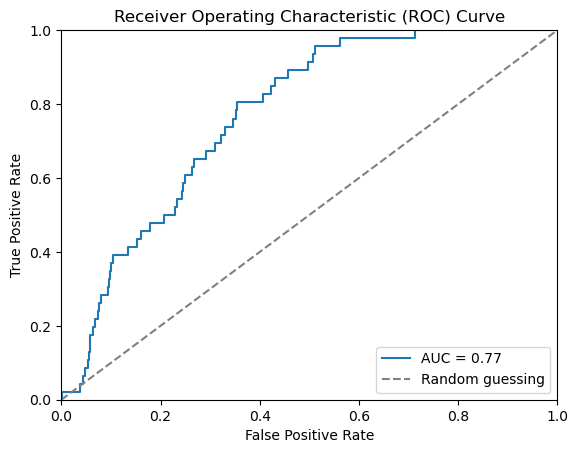

In [83]:
get_model_results_nn("Neural Network 2", predictions2, y_pred2, y_test2)